In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
fn = 'data/smartfactory.csv'
df = pd.read_csv(fn)
df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 구조 파악 (데이터 탐색)

In [73]:
# 데이터는 총 몇건입니까?
df.shape

(598, 2881)

In [74]:
# 컬럼명 확인
df.columns

Index(['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE',
       'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4',
       ...
       'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
       'X_2873', 'X_2874', 'X_2875'],
      dtype='object', length=2881)

In [75]:
# 각 컬럼별 연속형, 범주형 데이터 확인
# 주의) 수치형으로 표현된 데이터도 범주형으로 구분될 수 있음 (0, 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [76]:
# 수치형 데이터 - 기초 통계 정보 확인
df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


In [77]:
# 범주형 데이터만 확인해봅시다.
df.select_dtypes(include=['object'])

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE
0,TRAIN_000,2022-06-13 5:14,T050304,A_31
1,TRAIN_001,2022-06-13 5:22,T050307,A_31
2,TRAIN_002,2022-06-13 5:30,T050304,A_31
3,TRAIN_003,2022-06-13 5:39,T050307,A_31
4,TRAIN_004,2022-06-13 5:47,T050304,A_31
...,...,...,...,...
593,TRAIN_593,2022-09-08 14:30,T100306,T_31
594,TRAIN_594,2022-09-08 22:38,T050304,A_31
595,TRAIN_595,2022-09-08 22:47,T050304,A_31
596,TRAIN_596,2022-09-08 14:38,T100304,O_31


In [78]:
# 각 범주형 항목들이 어떤 값들로 구성되어있는지 확인해봅시다.
# 이 데이터셋에 어떤 LINE이 존재하나요?
df['LINE'].unique()

array(['T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305'],
      dtype=object)

In [79]:
# 이 데이터셋에 어떤 제품(PRODUCT)이 존재하나요?
df['PRODUCT_CODE'].unique()

array(['A_31', 'T_31', 'O_31'], dtype=object)

# 데이터 정제
- 결측치 확인
- 결측치 처리
    - 불필요한 column 삭제
    - 결측치 대체
- 중복데이터 탐색 및 처리

In [80]:
# 각 컬럼별 비어있는 데이터 건수 파악
df.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [124]:
# null값만 존재하는 컬럼 제외(필터링)하여 df_clean으로 저장
df_clean = df.loc[:, df.isnull().sum() != 598]
df_clean

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,NaN,NaN,NaN,NaN,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,NaN,NaN,NaN,NaN,...,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,NaN,NaN,NaN,NaN,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,NaN,NaN,NaN,NaN,...,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30:00,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38:00,T050304,A_31,NaN,NaN,NaN,NaN,...,168.7,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0
595,TRAIN_595,0,0.521289,2022-09-08 22:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,156.6,383.0,367.018868,352.0,NaN,NaN,NaN,NaN,NaN,1.0
596,TRAIN_596,1,0.531375,2022-09-08 14:38:00,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# 결측치가 존재하는 행 삭제
df_clean.dropna()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871


In [128]:
# 결측치 비율이 50%이상인 컬럼 제거하여 df_clean 변수에 저장
threshold = 0.5
df_clean = df_clean.loc[:, df_clean.isnull().mean() < threshold]
df_clean

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30:00,T100306,T_31,2.0,95.0,0.0,45.0,...,172.8,161.2,155.438710,149.0,327.0,313.363636,298.0,13.6,13.351613,13.2
594,TRAIN_594,0,0.524022,2022-09-08 22:38:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38:00,T100304,O_31,40.0,94.0,0.0,45.0,...,189.2,179.5,173.190323,168.6,321.0,303.036364,289.0,13.6,13.406667,13.2


In [113]:
# df_clean의 각 컬럼별 결측치 건수 재파악
df_clean.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_929         250
X_930         250
X_931         250
X_932         250
X_933         250
Length: 656, dtype: int64

In [130]:
# df_clean의 각 컬럼별 평균치 파악
df_clean.mean()

<ipython-input-130-3cdffd0ff59b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_clean.mean()


Y_Class        1.025084
Y_Quality      0.530896
X_1            2.409742
X_2           95.123209
X_3            0.000000
                ...    
X_929        307.148037
X_930        291.494253
X_931         13.641092
X_932         13.409719
X_933         13.212069
Length: 652, dtype: float64

In [131]:
# df_clean의 각 컬럼별 결측치를 평균치로 보간
df_clean = df_clean.fillna(df_clean.mean())
df_clean.head()

<ipython-input-131-11885cd6f4a6>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_clean = df_clean.fillna(df_clean.mean())


,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.24258,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.24258,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.24258,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.24258,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.24258,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069


In [132]:
# df_clean의 중복 row 확인
df_clean[df_clean.duplicated()==True]

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933


In [83]:
# 중복 row 제거
# df.drop_duplicates()

# 데이터 전처리
- 데이터 타입 변환
- 파생변수 생성
- 범주형 데이터 인코딩(one-how encoding)

In [133]:
# 전처리한 df_clean을 df로 다시 저장합니다.
df = df_clean

In [142]:
df.shape

(598, 656)

In [134]:
# TIMESTAMP열의 데이터 타입을 확인해봅시다
df['TIMESTAMP']

0     2022-06-13 05:14:00
1     2022-06-13 05:22:00
2     2022-06-13 05:30:00
3     2022-06-13 05:39:00
4     2022-06-13 05:47:00
              ...        
593   2022-09-08 14:30:00
594   2022-09-08 22:38:00
595   2022-09-08 22:47:00
596   2022-09-08 14:38:00
597   2022-09-08 14:46:00
Name: TIMESTAMP, Length: 598, dtype: datetime64[ns]

In [135]:
# TIMESTAMP열의 데이터 타입을 datetime으로 변경합니다.
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['TIMESTAMP']

0     2022-06-13 05:14:00
1     2022-06-13 05:22:00
2     2022-06-13 05:30:00
3     2022-06-13 05:39:00
4     2022-06-13 05:47:00
              ...        
593   2022-09-08 14:30:00
594   2022-09-08 22:38:00
595   2022-09-08 22:47:00
596   2022-09-08 14:38:00
597   2022-09-08 14:46:00
Name: TIMESTAMP, Length: 598, dtype: datetime64[ns]

In [136]:
# 공정라인(LINE)과 제품코드(PRODUCT_CODE)를 결합하여 공정라인_제품코드 값으로 구성된 LINE_PRODUCT_CODE 변수를 생성합니다.


In [137]:
# 제품코드를 인코딩 처리합니다.
pd.get_dummies(df, columns=['PRODUCT_CODE'])

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,X_1,X_2,X_3,X_4,X_5,...,X_927,X_928,X_929,X_930,X_931,X_932,X_933,PRODUCT_CODE_A_31,PRODUCT_CODE_O_31,PRODUCT_CODE_T_31
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30:00,T100306,2.000000,95.000000,0.0,45.0,10.00000,...,149.000000,327.000000,313.363636,298.000000,13.600000,13.351613,13.200000,0,0,1
594,TRAIN_594,0,0.524022,2022-09-08 22:38:00,T050304,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
595,TRAIN_595,0,0.521289,2022-09-08 22:47:00,T050304,2.409742,95.123209,0.0,45.0,10.39255,...,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069,1,0,0
596,TRAIN_596,1,0.531375,2022-09-08 14:38:00,T100304,40.000000,94.000000,0.0,45.0,11.00000,...,168.600000,321.000000,303.036364,289.000000,13.600000,13.406667,13.200000,0,1,0


# 데이터시각화
## 단변량 분석
    - 연속형 데이터 분포 : histogram
    - 범주형 데이터 분포 : countplot

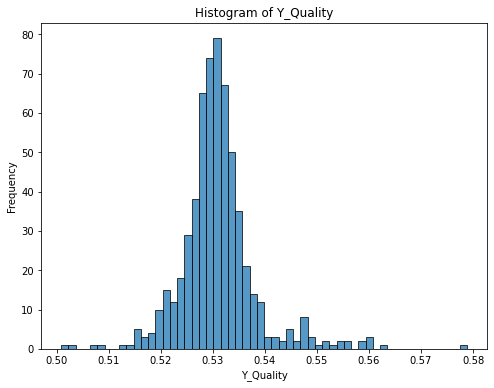

In [138]:
# Y_Quality 히스토그램 시각화
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Y_Quality'])
plt.title('Histogram of Y_Quality')
plt.xlabel('Y_Quality')
plt.ylabel('Frequency')
plt.show()

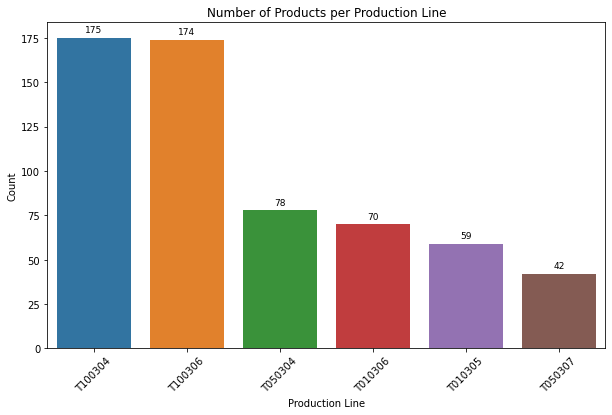

In [139]:
# 공정 라인별 제품 수 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LINE', data=df, order=df['LINE'].value_counts().index)

# 값 표시방법
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
    
plt.title('Number of Products per Production Line')
plt.xlabel('Production Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


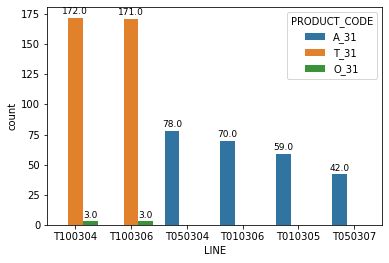

In [140]:
# 그룹간비교-공정 라인별 제품별 비교
ax = sns.countplot(x = 'LINE', data = df, hue = 'PRODUCT_CODE', dodge = True,
                  order = df['LINE'].value_counts().index)

# 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
# ax.set_ylim(-5, 100)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


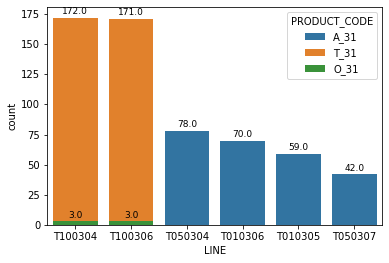

In [91]:
# 누적 막대그래프로 표시
ax = sns.countplot(x = 'LINE', data = df, hue = 'PRODUCT_CODE', dodge = False,
                  order = df['LINE'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

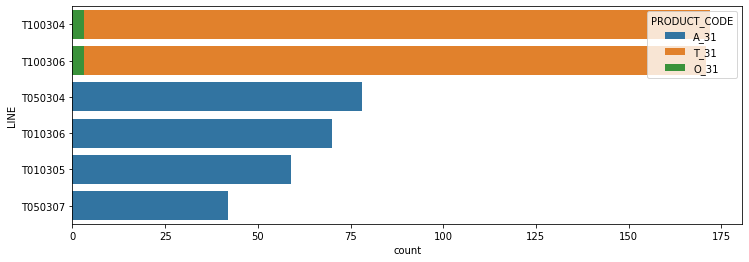

In [92]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(y = 'LINE', data = df, hue = 'PRODUCT_CODE', dodge = False,
                  order = df['LINE'].value_counts().index)

plt.show()

## 다변량 분석
 - 산점도
 - heatmap
 - boxplot

In [144]:
# 변수간 상관도 확인
df.corr()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
Y_Class,1.000000,0.813885,0.004189,-0.052453,NaN,NaN,-0.052164,NaN,0.030883,0.050523,...,0.054539,0.028709,0.012462,-0.016009,0.034477,0.018744,0.019034,-0.028227,-0.050990,-0.019561
Y_Quality,0.813885,1.000000,-0.003123,-0.049819,NaN,NaN,-0.040299,NaN,0.034902,0.023757,...,0.051379,0.035960,0.010681,-0.010072,0.027633,0.007028,0.018438,-0.022406,-0.026600,-0.011459
X_1,0.004189,-0.003123,1.000000,-0.009092,NaN,NaN,0.079607,NaN,-0.024264,-0.018011,...,0.335617,0.306952,0.403888,0.336758,-0.064289,-0.063098,-0.037926,-0.137885,-0.100614,-0.104002
X_2,-0.052453,-0.049819,-0.009092,1.000000,NaN,NaN,0.569530,NaN,-0.597949,-0.195017,...,-0.018993,-0.018548,-0.037984,-0.022647,0.024173,-0.007315,0.005290,0.021584,0.026522,-0.023481
X_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_929,0.018744,0.007028,-0.063098,-0.007315,NaN,NaN,-0.117651,NaN,0.071891,0.011727,...,0.087523,-0.052723,-0.028051,0.059989,0.811476,1.000000,0.868596,0.034493,-0.003722,-0.005902
X_930,0.019034,0.018438,-0.037926,0.005290,NaN,NaN,-0.106003,NaN,0.053279,-0.001221,...,0.066345,-0.028468,-0.016804,0.078317,0.603025,0.868596,1.000000,0.047310,0.032317,0.021832
X_931,-0.028227,-0.022406,-0.137885,0.021584,NaN,NaN,0.001211,NaN,-0.073380,0.072048,...,-0.052963,-0.011189,-0.035345,-0.045126,0.008029,0.034493,0.047310,1.000000,0.779179,0.565755
X_932,-0.050990,-0.026600,-0.100614,0.026522,NaN,NaN,-0.006324,NaN,-0.084130,0.069512,...,-0.053230,0.057290,0.008223,-0.026055,-0.006598,-0.003722,0.032317,0.779179,1.000000,0.773648


In [152]:
# 특정 변수만 선택하여 상관도 확인
cols = ['Y_Quality', 'Y_Class', 'X_73', 'X_480', 'X_910', 'X_771', 'X_772', 'X_793', 'X_62', 'X_693']

df[cols].corr()

,Y_Quality,Y_Class,X_73,X_480,X_910,X_771,X_772,X_793,X_62,X_693
Y_Quality,1.000000,0.813885,0.166587,-0.107829,-0.107829,0.088100,0.087192,0.085157,0.081299,0.072483
Y_Class,0.813885,1.000000,0.149214,-0.052783,-0.052783,0.101816,0.100589,0.059755,0.073867,0.073526
X_73,0.166587,0.149214,1.000000,-0.085133,-0.085133,0.143337,0.153370,0.010749,-0.228905,0.100961
X_480,-0.107829,-0.052783,-0.085133,1.000000,1.000000,0.064264,0.065183,0.006166,0.063120,-0.006980
X_910,-0.107829,-0.052783,-0.085133,1.000000,1.000000,0.064264,0.065183,0.006166,0.063120,-0.006980
X_771,0.088100,0.101816,0.143337,0.064264,0.064264,1.000000,0.915741,-0.078852,0.095056,0.003446
X_772,0.087192,0.100589,0.153370,0.065183,0.065183,0.915741,1.000000,-0.045540,0.109710,0.037512
X_793,0.085157,0.059755,0.010749,0.006166,0.006166,-0.078852,-0.045540,1.000000,0.027466,-0.031569
X_62,0.081299,0.073867,-0.228905,0.063120,0.063120,0.095056,0.109710,0.027466,1.000000,0.026001
X_693,0.072483,0.073526,0.100961,-0.006980,-0.006980,0.003446,0.037512,-0.031569,0.026001,1.000000


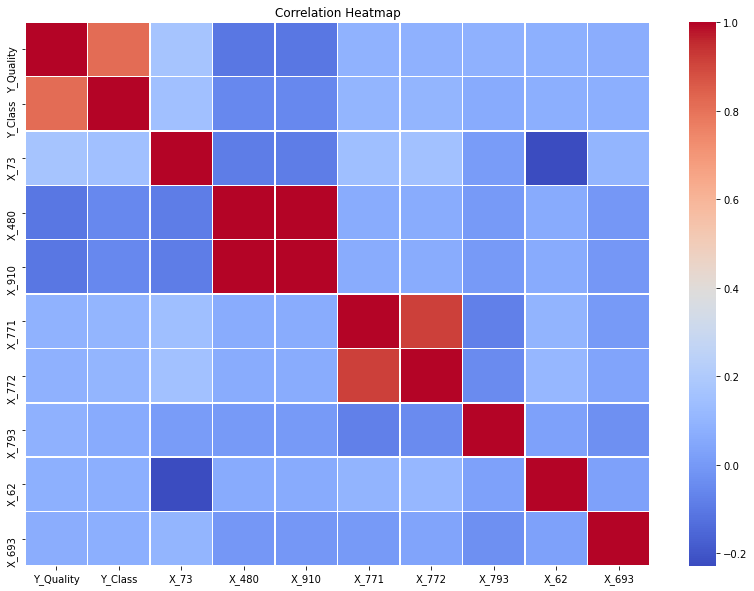

In [157]:
correlation_matrix = df[cols].corr()

# 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

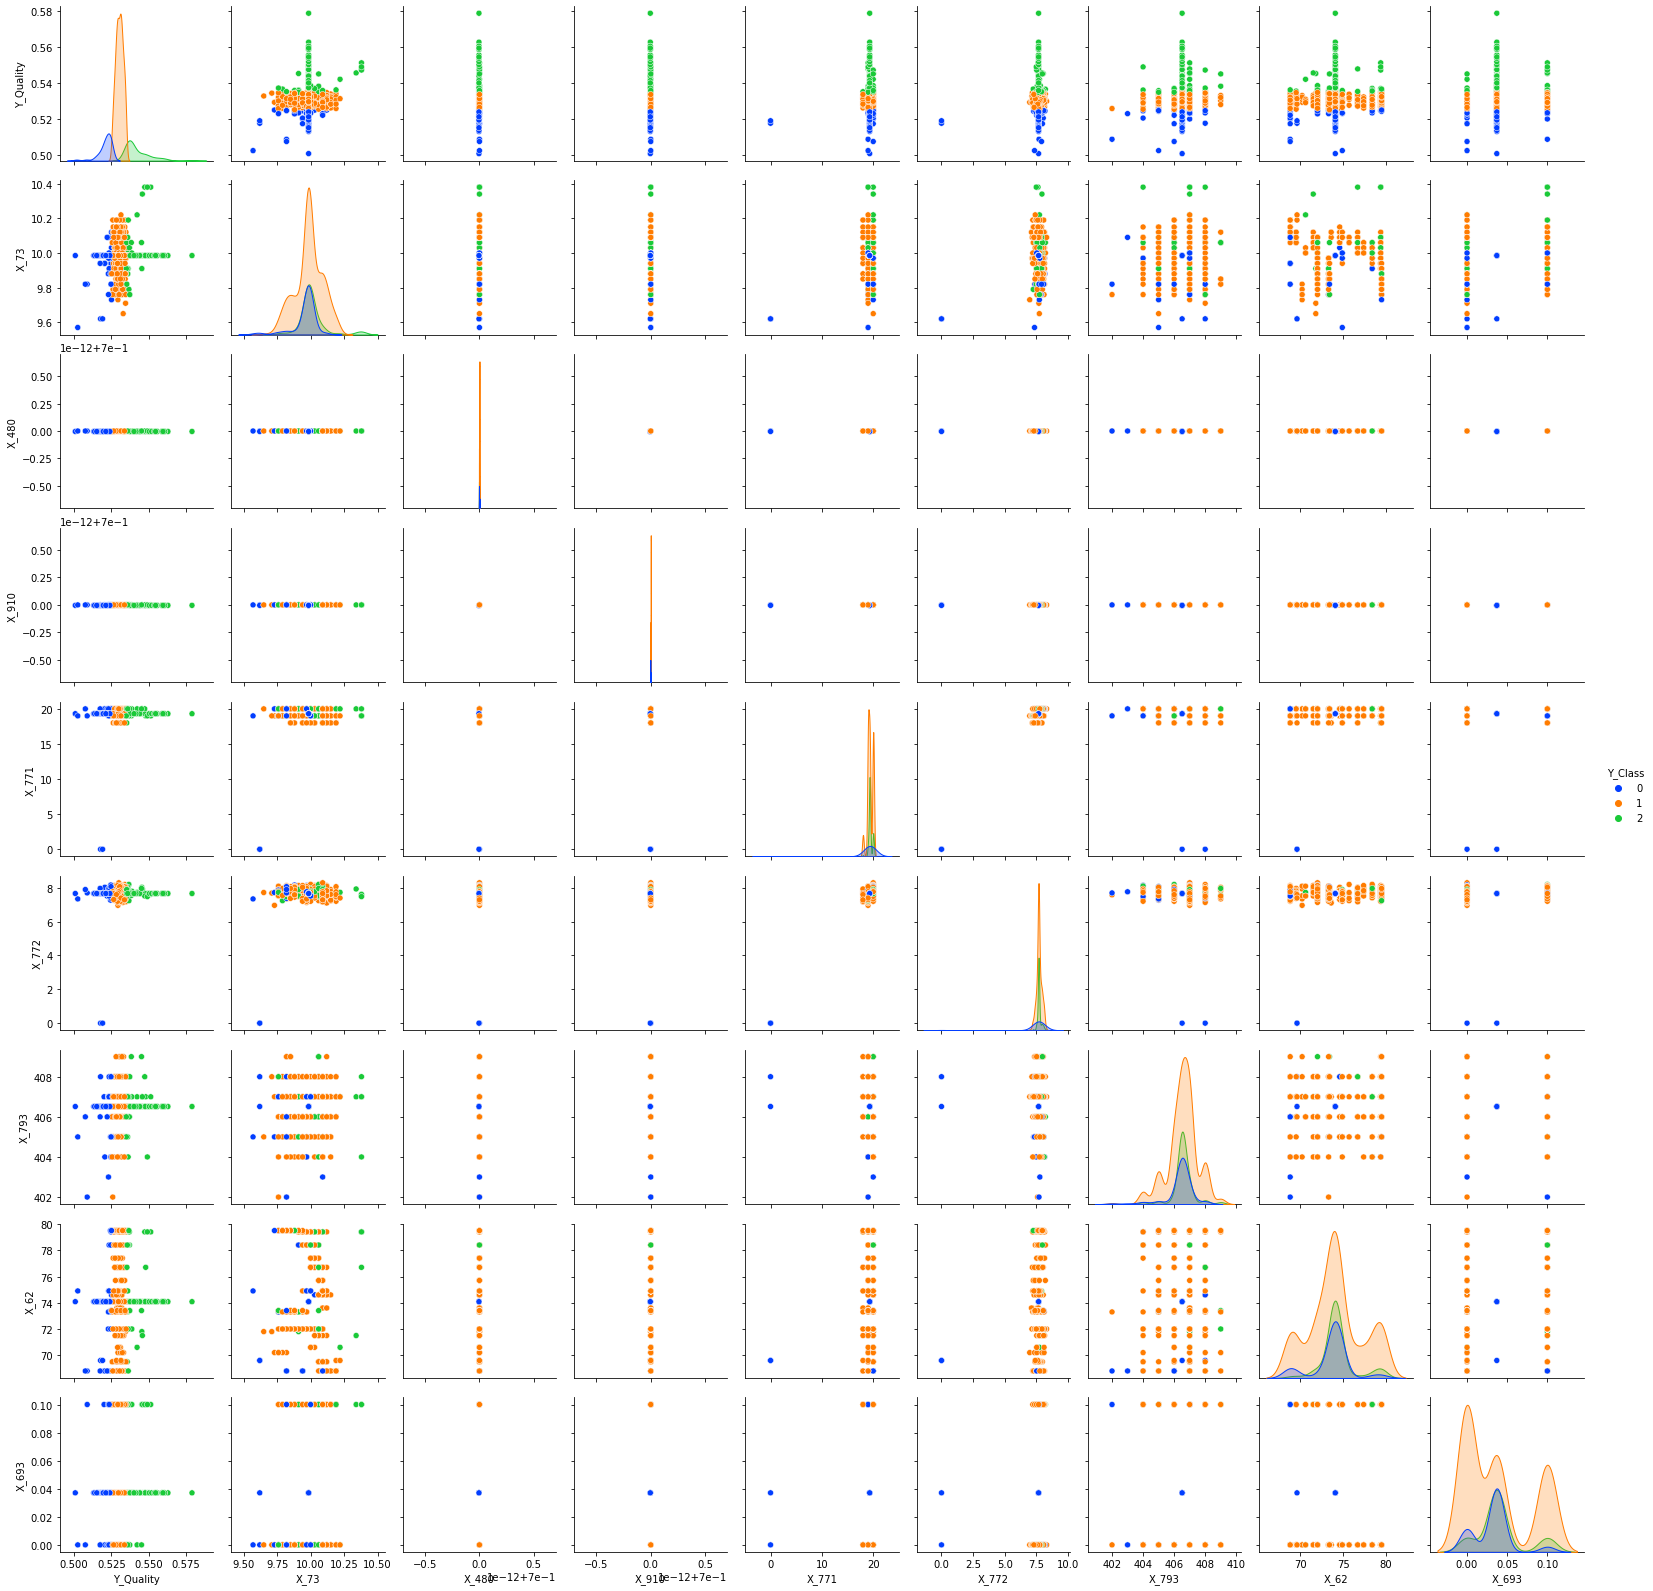

In [155]:
# 산점도 행렬 Matix를 통해 변수간 관계 파악하기
sns.pairplot(df[cols], hue="Y_Class", palette='bright') # pastel, bright, deep, muted, colorblind, dark
plt.show()

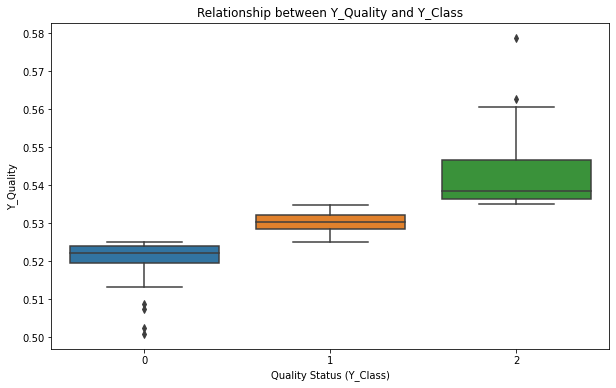

In [147]:
# Y_Quality와 Y_Class의 관계 시각화
# 제품 품질 상태(Y_Class)별 Y_Quality의 범위 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='Y_Class', y='Y_Quality', data=df)
plt.title('Relationship between Y_Quality and Y_Class')
plt.xlabel('Quality Status (Y_Class)')
plt.ylabel('Y_Quality')
plt.show()


## 시계열데이터 시각화 - 추세 분석

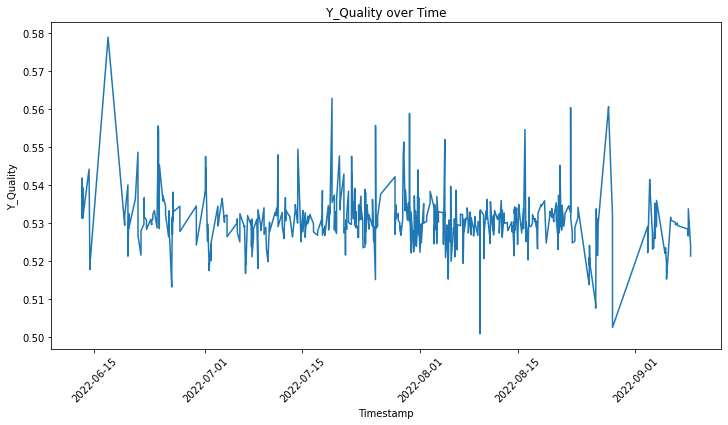

In [94]:
# 시간에 따른 Y_Quality 변화 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='TIMESTAMP', y='Y_Quality', data=df)
plt.title('Y_Quality over Time')
plt.xlabel('Timestamp')
plt.ylabel('Y_Quality')
plt.xticks(rotation=45)
plt.show()

In [95]:
df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30:00,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38:00,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47:00,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38:00,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
data = df
data

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
1,TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
2,TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
3,TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
4,TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30:00,T100306,T_31,2.000000,95.000000,0.0,45.0,...,172.800000,161.200000,155.438710,149.000000,327.000000,313.363636,298.000000,13.600000,13.351613,13.200000
594,TRAIN_594,0,0.524022,2022-09-08 22:38:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
595,TRAIN_595,0,0.521289,2022-09-08 22:47:00,T050304,A_31,2.409742,95.123209,0.0,45.0,...,173.048851,160.670402,154.242580,147.472126,323.215517,307.148037,291.494253,13.641092,13.409719,13.212069
596,TRAIN_596,1,0.531375,2022-09-08 14:38:00,T100304,O_31,40.000000,94.000000,0.0,45.0,...,189.200000,179.500000,173.190323,168.600000,321.000000,303.036364,289.000000,13.600000,13.406667,13.200000


# 축이 2개인 그래프 그리기 - 관리도 차트(Control Chart)

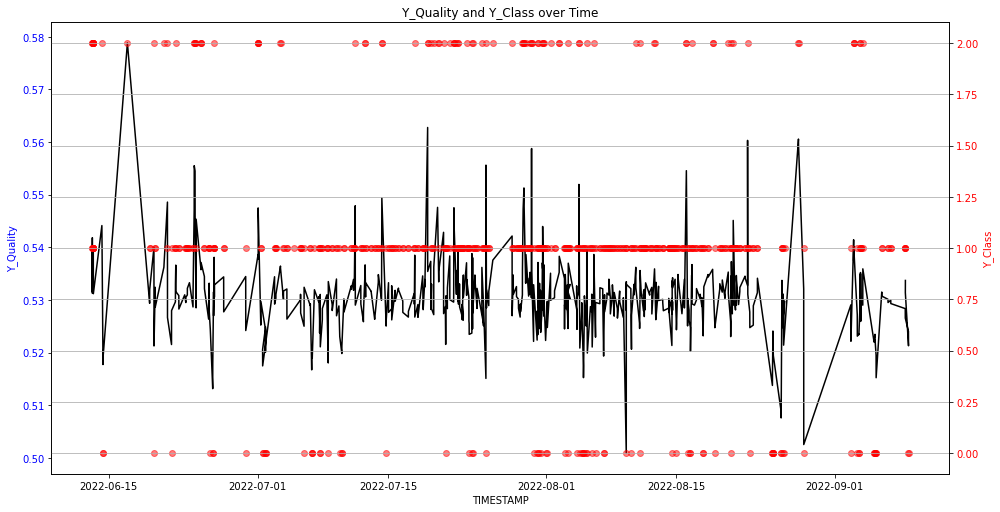

In [162]:

data = df
# Y축이 두 개인 라인 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 Y축: Y_Quality 라인 그래프
ax1.set_xlabel('TIMESTAMP')
ax1.set_ylabel('Y_Quality', color='blue')
ax1.plot(data['TIMESTAMP'], data['Y_Quality'], label='Y_Quality', color='black')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축: Y_Class 스캐터 플롯
ax2 = ax1.twinx()
ax2.set_ylabel('Y_Class', color='red')
ax2.scatter(data.loc[:, 'TIMESTAMP'], data.loc[:, 'Y_Class'], label='Y_Class', color='red', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 설정 및 겹침 방지
fig.tight_layout()
plt.title('Y_Quality and Y_Class over Time')
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()


A_31


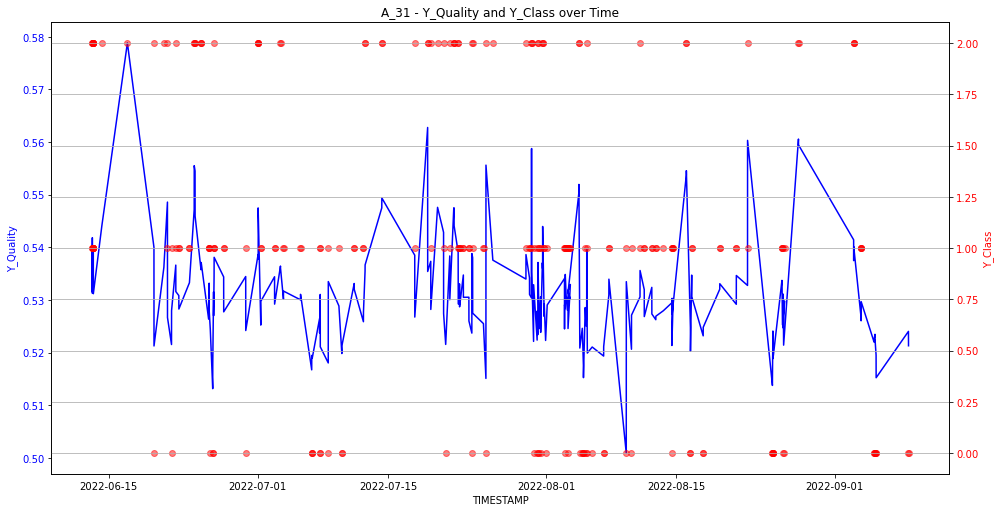

T_31


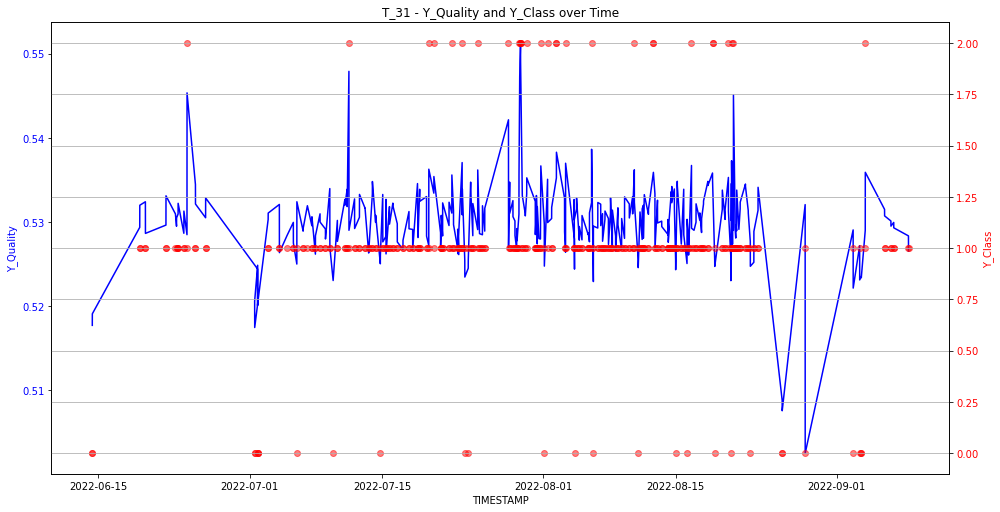

O_31


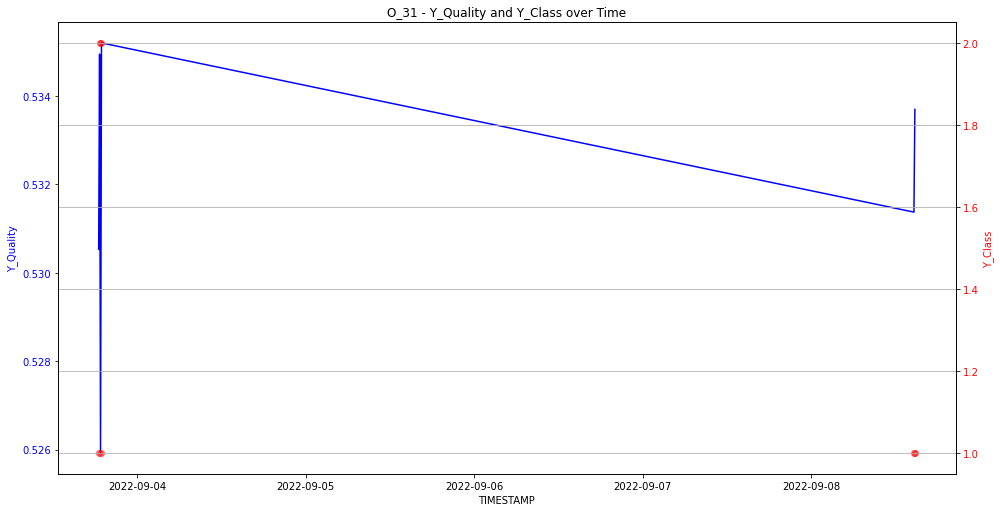

In [104]:
for prd in df['PRODUCT_CODE'].unique():
    print(prd)
    
    data = df[df['PRODUCT_CODE'] == prd]
    # Y축이 두 개인 라인 그래프 생성
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 첫 번째 Y축: Y_Quality 라인 그래프
    ax1.set_xlabel('TIMESTAMP')
    ax1.set_ylabel('Y_Quality', color='blue')
    ax1.plot(data['TIMESTAMP'], data['Y_Quality'], label='Y_Quality', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 두 번째 Y축: Y_Class 스캐터 플롯
    ax2 = ax1.twinx()
    ax2.set_ylabel('Y_Class', color='red')
    ax2.scatter(data.loc[:, 'TIMESTAMP'], data.loc[:, 'Y_Class'], label='Y_Class', color='red', alpha=0.5)
    ax2.tick_params(axis='y', labelcolor='red')

    # 그래프 제목 설정 및 겹침 방지
    fig.tight_layout()
    plt.title(f'{prd} - Y_Quality and Y_Class over Time')
    plt.xticks(rotation=45)
    plt.grid(True)

    # 그래프 출력
    plt.show()

T050304


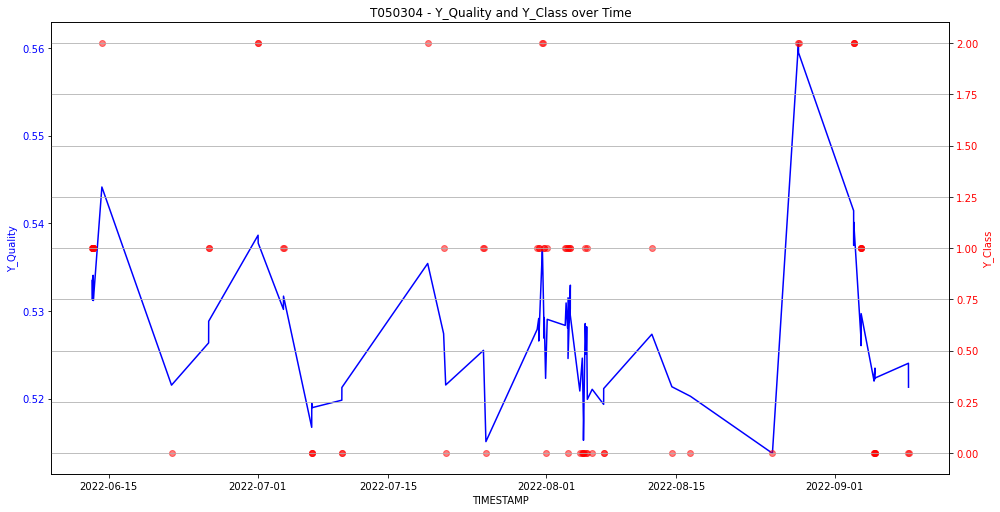

T050307


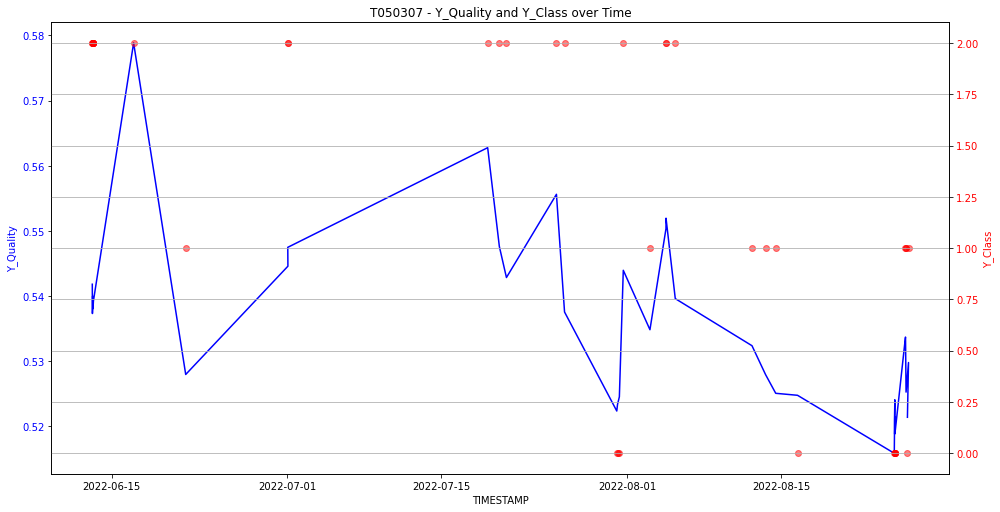

T100304


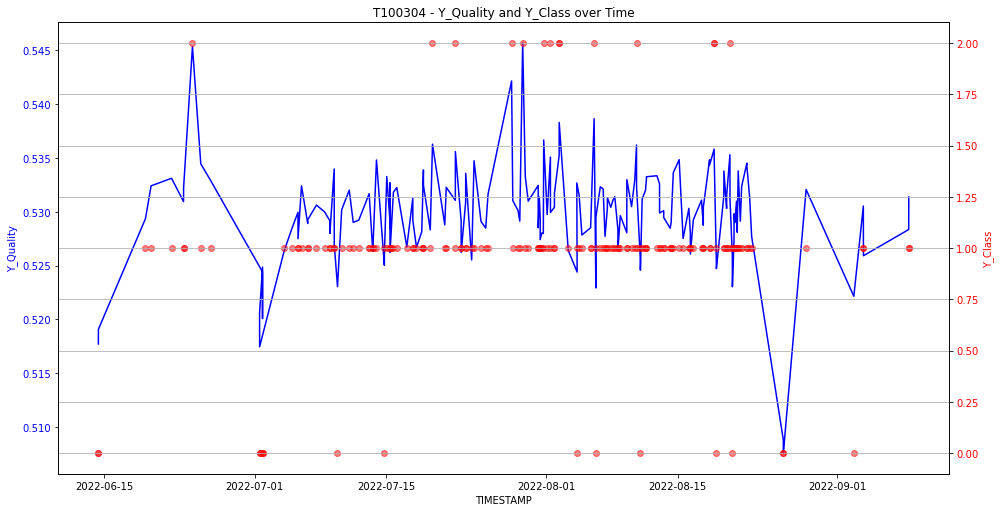

T100306


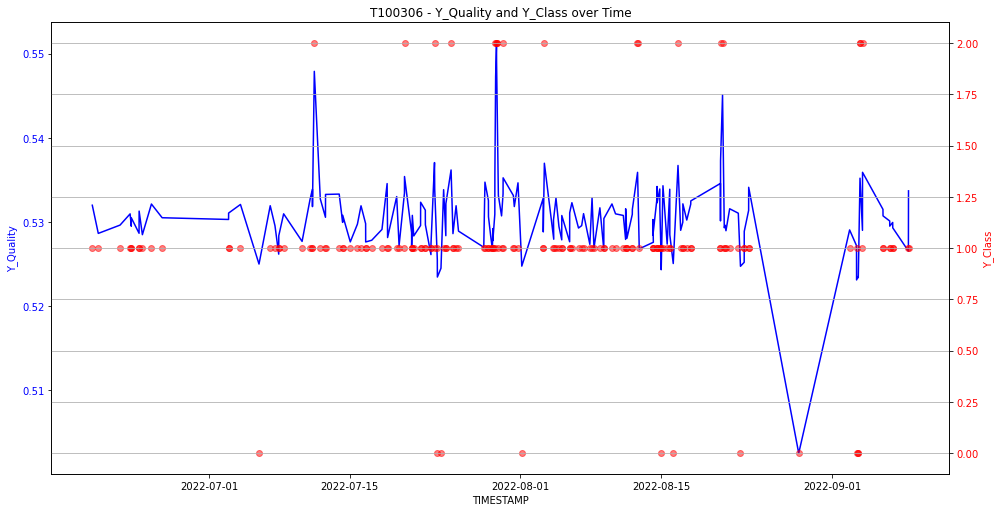

T010306


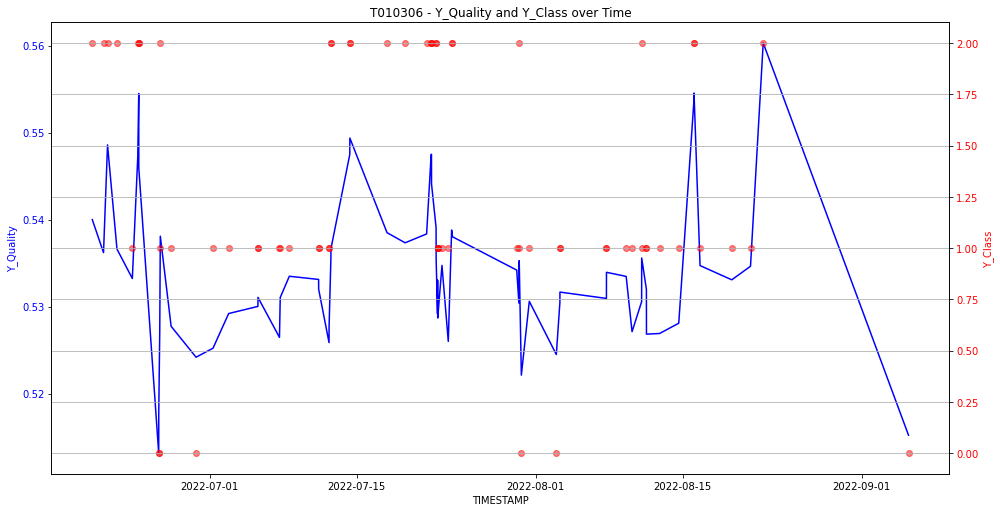

T010305


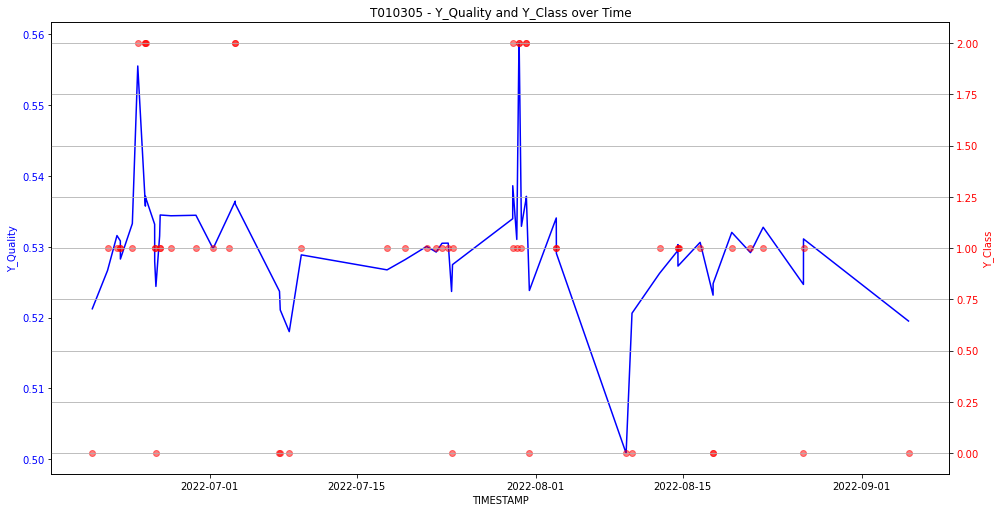

In [160]:
for line in df['LINE'].unique():
    print(line)
    
    data = df[df['LINE'] == line]
    # Y축이 두 개인 라인 그래프 생성
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 첫 번째 Y축: Y_Quality 라인 그래프
    ax1.set_xlabel('TIMESTAMP')
    ax1.set_ylabel('Y_Quality', color='blue')
    ax1.plot(data['TIMESTAMP'], data['Y_Quality'], label='Y_Quality', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 두 번째 Y축: Y_Class 스캐터 플롯
    ax2 = ax1.twinx()
    ax2.set_ylabel('Y_Class', color='red')
    ax2.scatter(data.loc[:, 'TIMESTAMP'], data.loc[:, 'Y_Class'], label='Y_Class', color='red', alpha=0.5)
    ax2.tick_params(axis='y', labelcolor='red')

    # 그래프 제목 설정 및 겹침 방지
    fig.tight_layout()
    plt.title(f'{line} - Y_Quality and Y_Class over Time')
    plt.xticks(rotation=45)
    plt.grid(True)

    # 그래프 출력
    plt.show()